<a href="https://colab.research.google.com/github/carlosvint/AprendizajeAutomaticoCienciaDatos2025/blob/main/Clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Inicializar K centroides aleatorios
REPETIR:
    1. Asignar cada punto al centroide más cercano
    2. Mover cada centroide al promedio de sus puntos asignados
HASTA que los centroides no cambien (o lleguen al máximo de iteraciones)"""

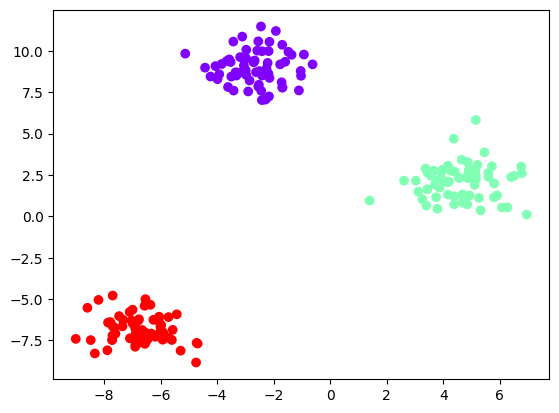

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples = 200, centers = 3, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
plt.show()

In [3]:
import numpy as np


def kmeans(X, K, max_iters=100):
  #1. Inicializar los centroides aleatoriamente
  idx = np.random.choice(len(X), K, replace=False)
  centroids = X[idx]

  for iter in range(max_iters):
    print(iter)
    #2. Calcular las distancias de cada punto al centroide
    distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)

    #3. Asignar cada punto al cluster/centroide mas cercanos
    labels = np.argmin(distances, axis=1)

    #4. Recalcular los centroides basados en las distancias a la data
    new_centroids = np.array([
        X[labels == k].mean(axis = 0) if np.any(labels == k) else centroids[k]
        for k in range(K)
    ])

    #5. Convergencia
    if np.allclose(centroids, new_centroids):
      break

    centroids = new_centroids

  return centroids, labels

In [4]:
centroids, labels = kmeans(X, K=3)

0
1


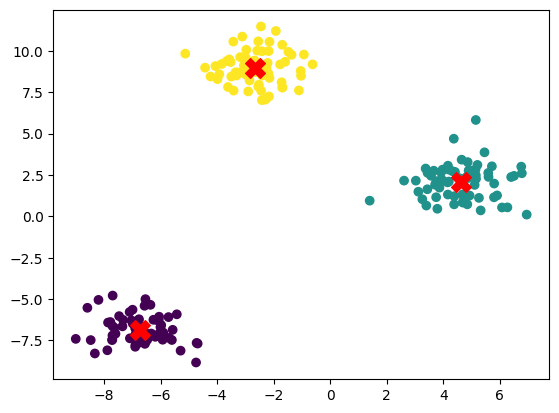

In [5]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="red", s=200, marker="X")
plt.show()

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

print(kmeans.cluster_centers_)

[[-2.65882129  8.95756821]
 [-6.74539381 -6.85144337]
 [ 4.63218228  2.10121377]]


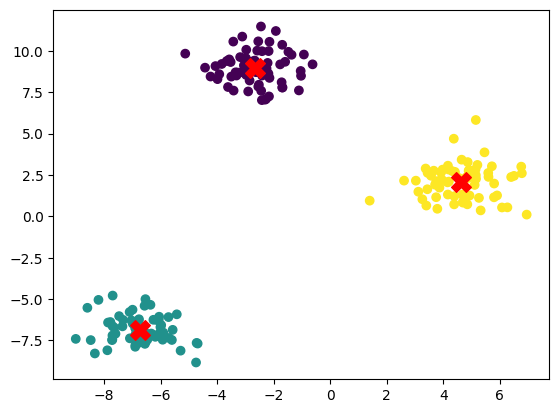

In [8]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c="red", marker="X")
plt.show()


In [9]:
X, y_true = make_blobs(n_samples=500, centers=3, random_state=42)

In [11]:
inertias = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_) #suma de las distancias intra-cluster


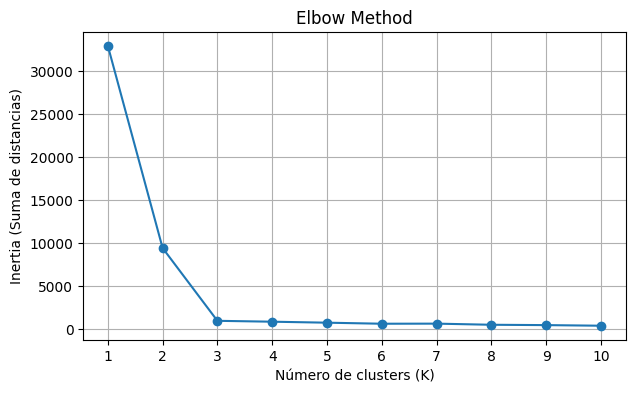

In [12]:
plt.figure(figsize=(7,4))
plt.plot(K_values, inertias, marker='o')
plt.xticks(K_values)
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inertia (Suma de distancias)")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

# -> 1 muy bien agrupado
# -> 0 -> limites
# -> -1 -> mal agrupado

sil_score = []
K_values = range(2,11)
for k in K_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_score.append(score)

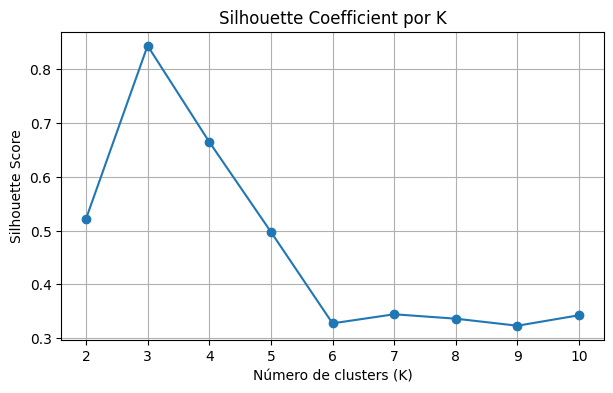

In [15]:
plt.figure(figsize=(7,4))
plt.plot(K_values, sil_score, marker='o')
plt.xticks(K_values)
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Coefficient por K")
plt.grid(True)
plt.show()

In [17]:
## DBSCAN
# Density
# Based
# Spatial
# Clustering of
# Applications with
# Noise


#Tenemos dos hiperparametros eps -> vecindad - que tan cerca debe estar para considerarse vecinos / min_samples -> numero minimo de puntos que deben estar cerca para considerarse una vecindad

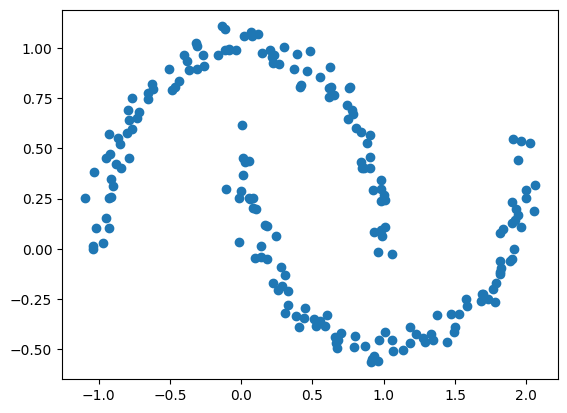

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Datos no esfericos
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

plt.scatter(X[:,0], X[:,1])
plt.show()


In [19]:
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

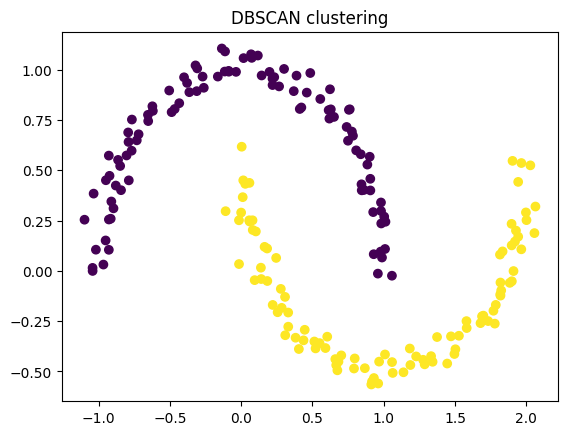

In [20]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.title("DBSCAN clustering")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

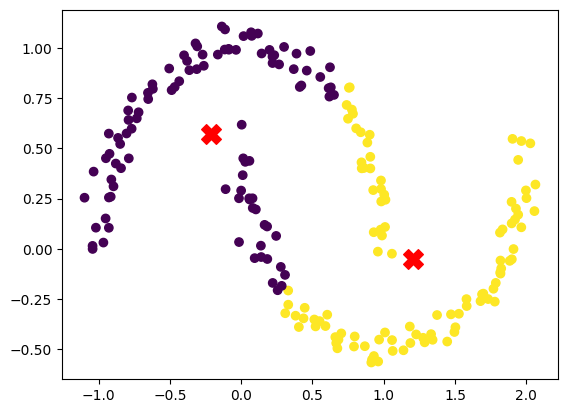

In [22]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c="red", marker="X")
plt.show()


In [ ]:
## Clustering jerarquico

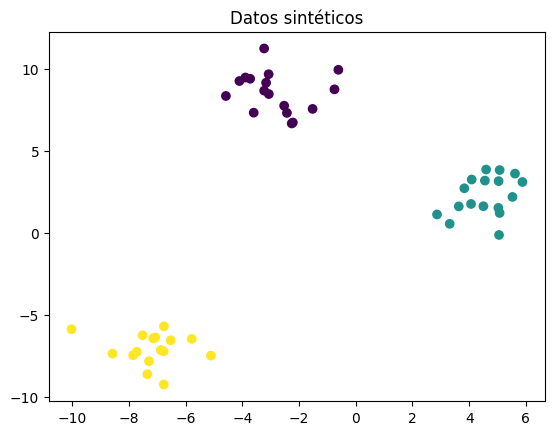

In [29]:
X, y_true = make_blobs(
    n_samples=50, centers=3, random_state=42, cluster_std=1.2
)

plt.scatter(X[:,0], X[:,1], c=y_true, cmap="viridis")
plt.title("Datos sintéticos")
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)

labels = model.fit_predict(X)

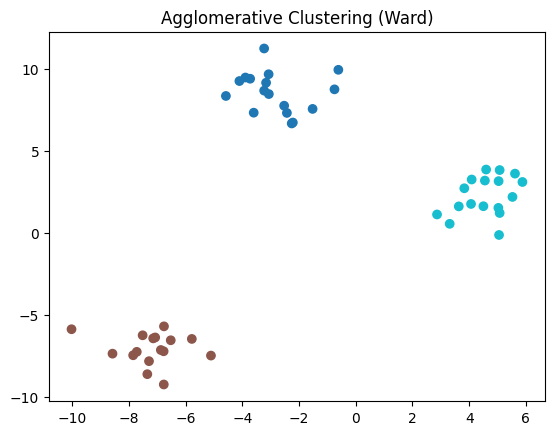

In [31]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap="tab10")
plt.title("Agglomerative Clustering (Ward)")
plt.show()

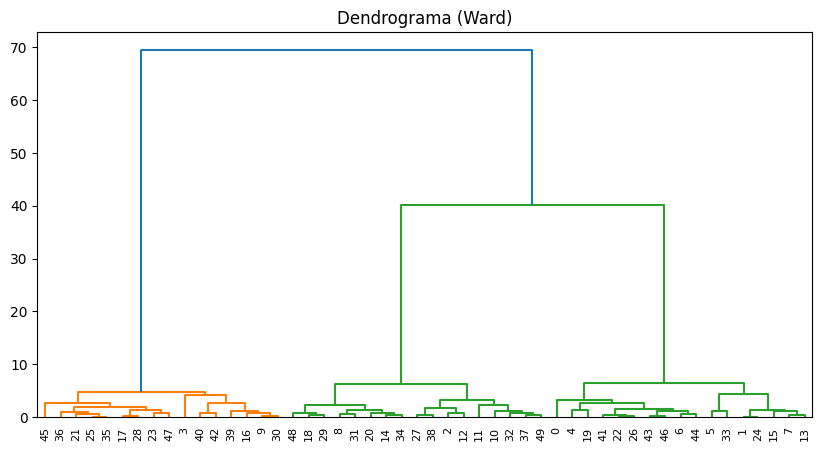

In [32]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title("Dendrograma (Ward)")
plt.show()


In [33]:
# Reduccion de dimensionalidades - PCA

from sklearn.decomposition import PCA

np.random.seed(42)

n_samples = 500
n_features = 8

X = np.random.randn(n_samples, n_features)

X[:, 4] = X[:, 0] * 0.8 + np.random.randn(n_samples) * 0.2
X[:, 5] = X[:, 1] * 0.5 + np.random.randn(n_samples) * 0.3
X[:, 6] = X[:, 2] * -0.6 + np.random.randn(n_samples) * 0.25
X[:, 7] = X[:, 3] * 1.0 + np.random.randn(n_samples) * 0.1

In [35]:
X.shape

(500, 8)

In [36]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [37]:
print(pca.explained_variance_ratio_)

[0.3192909 0.2513045]


In [38]:
print(pca.explained_variance_ratio_.sum())

0.5705954029150155


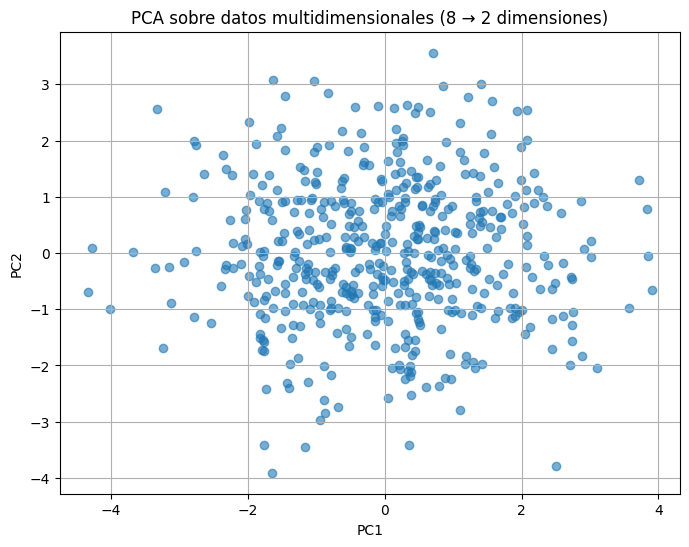

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title("PCA sobre datos multidimensionales (8 → 2 dimensiones)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


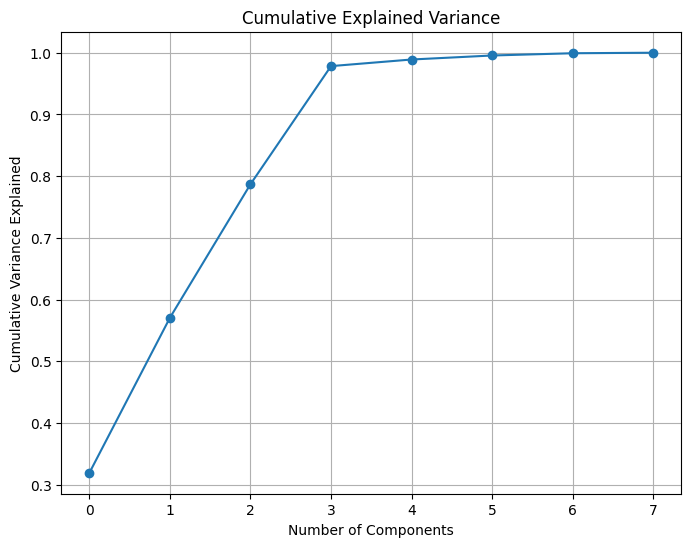

In [40]:
#Scree plot
pca_full = PCA()
pca_full.fit(X)

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()


# Task
Analyze the Iris dataset by performing PCA to reduce its dimensionality to 2 components. Then, apply K-Means clustering with K=3 to the PCA-transformed data. Visualize the PCA-transformed data colored by the K-Means cluster labels and also by the true Iris species labels, comparing the clustering results with the actual species. Summarize the findings.

## Load Iris Dataset

### Subtask:
Load the Iris dataset using scikit-learn's `load_iris` function.


**Reasoning**:
The subtask is to load the Iris dataset. This step involves importing `load_iris`, loading the dataset, and extracting features `X` and target `y`.



In [41]:
from sklearn.datasets import load_iris

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

print("Iris dataset loaded successfully.")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Iris dataset loaded successfully.
Shape of features (X): (150, 4)
Shape of target (y): (150,)


## Perform PCA

### Subtask:
Apply Principal Component Analysis (PCA) to reduce the dimensionality of the Iris dataset to 2 components. This will allow for easy visualization.


**Reasoning**:
To reduce the dimensionality of the Iris dataset, I will apply PCA with 2 components, as specified in the subtask instructions.



In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("PCA applied successfully. Original dimensions:", X.shape, "Reduced dimensions:", X_pca.shape)

PCA applied successfully. Original dimensions: (150, 4) Reduced dimensions: (150, 2)


## Apply K-Means Clustering

### Subtask:
Perform K-Means clustering on the PCA-transformed data. Since the Iris dataset has 3 known classes, we'll set the number of clusters (K) to 3.


**Reasoning**:
I will import the KMeans class, instantiate it with K=3 and a fixed random state, then fit it to the PCA-transformed data (X_pca) and retrieve the cluster labels.



In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_pca)

print("K-Means clustering applied successfully.")
print(f"First 10 K-Means labels: {kmeans_labels[:10]}")

K-Means clustering applied successfully.
First 10 K-Means labels: [1 1 1 1 1 1 1 1 1 1]


## Visualize PCA and K-Means Clusters

### Subtask:
Create a scatter plot of the two principal components, coloring the points by the assigned K-Means cluster labels. Also, plot the cluster centers. Ensure to include appropriate labels and a legend.


**Reasoning**:
To visualize the PCA-transformed data and the K-Means clusters, I need to create a scatter plot. This will involve plotting the principal components, coloring them by the assigned cluster labels, and marking the cluster centers. I will then add a title, axis labels, and a legend as instructed.



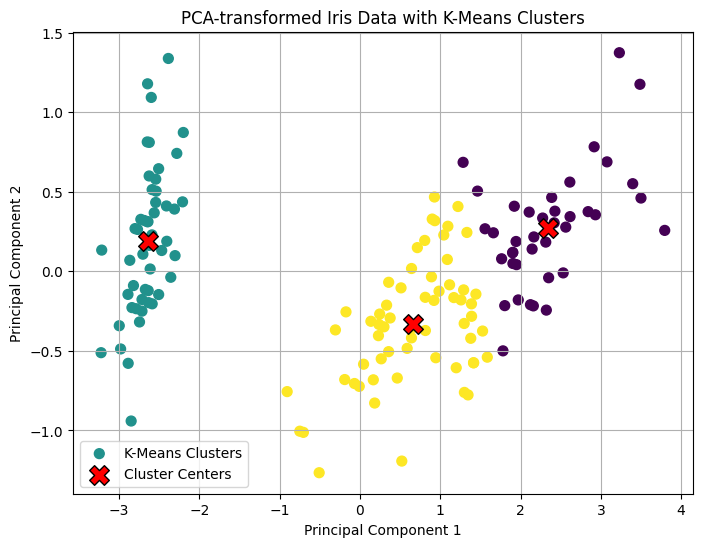

Scatter plot showing PCA-transformed data with K-Means cluster labels and centers generated.


In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Scatter plot of PCA-transformed data, colored by K-Means labels
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, label='K-Means Clusters')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='X', c='red', edgecolor='black', label='Cluster Centers')

plt.title('PCA-transformed Iris Data with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
print("Scatter plot showing PCA-transformed data with K-Means cluster labels and centers generated.")

## Visualize PCA with True Labels

### Subtask:
Create another scatter plot of the two principal components, but this time color the points by the original Iris species labels to compare with the K-Means results. Ensure to include appropriate labels and a legend.


**Reasoning**:
To visualize the PCA-transformed data with true species labels, I need to create a scatter plot. This will involve plotting the principal components, coloring them by the original target labels, and adding a title, axis labels, legend, and grid as instructed.



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

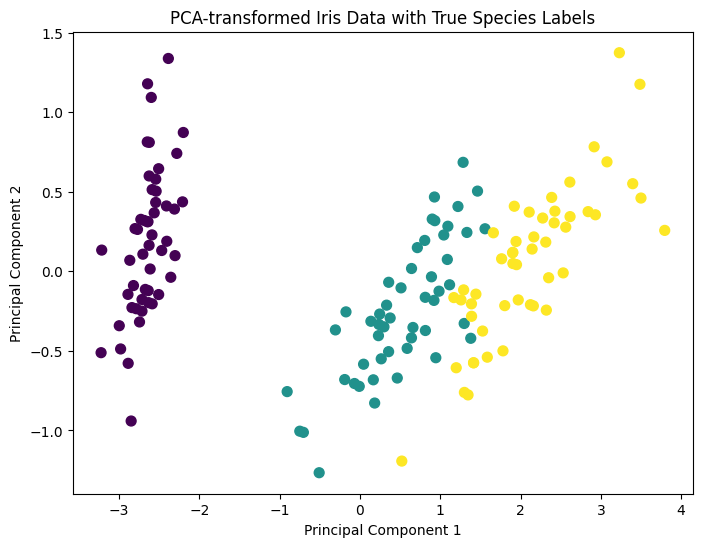

In [45]:
plt.figure(figsize=(8, 6))
# Scatter plot of PCA-transformed data, colored by true species labels
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, label='True Species Labels')

plt.title('PCA-transformed Iris Data with True Species Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a legend
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=iris_data.target_names)

plt.grid(True)
plt.show()
print("Scatter plot showing PCA-transformed data with true species labels generated.")

**Reasoning**:
The previous code failed because `scatter.legend_elements()` generates numerical labels which then caused a `ValueError` when combined with `iris_data.target_names` in `plt.legend`. To fix this, I will plot each species group separately and assign the true species names directly as labels, allowing `plt.legend()` to correctly display them without ambiguity.



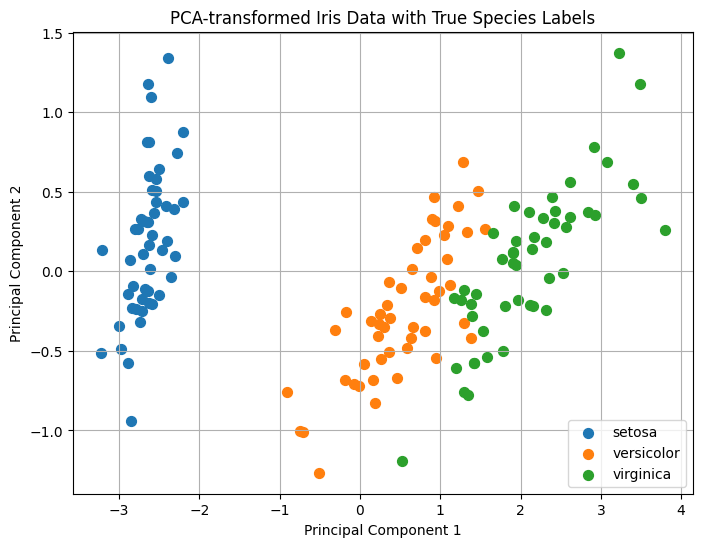

Scatter plot showing PCA-transformed data with true species labels generated.


In [46]:
import numpy as np

plt.figure(figsize=(8, 6))

# Get unique true labels
unique_labels = np.unique(y)

# Plot each species separately to ensure correct legend mapping
for label_value in unique_labels:
    mask = (y == label_value)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                s=50,
                label=iris_data.target_names[label_value] # Use true species names for labels
               )

plt.title('PCA-transformed Iris Data with True Species Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# The legend will now automatically use the labels provided in the scatter calls
plt.legend()

plt.grid(True)
plt.show()
print("Scatter plot showing PCA-transformed data with true species labels generated.")

## Final Task

### Subtask:
Summarize the results of the PCA and K-Means clustering on the Iris dataset, highlighting the effectiveness of clustering based on the visualizations.


## Summary:

### Q&A
The results of the PCA and K-Means clustering on the Iris dataset demonstrate that K-Means clustering is highly effective in identifying the natural groupings within the dataset, largely aligning with the true Iris species. The visualizations show that the K-Means algorithm, when set to 3 clusters, successfully separates the data points into three distinct groups that closely correspond to the three known Iris species (setosa, versicolor, and virginica) after dimensionality reduction by PCA. This suggests that the underlying structure of the Iris dataset is well-captured by K-Means, particularly for the setosa species which is clearly separated, while there is some overlap between versicolor and virginica, consistent with biological observations and other analyses.

### Data Analysis Key Findings
*   The Iris dataset, consisting of 150 samples with 4 features each, was successfully loaded and prepared for analysis.
*   Principal Component Analysis (PCA) successfully reduced the dataset's dimensionality from 4 features to 2 principal components, making it suitable for 2D visualization.
*   K-Means clustering with \$K=3\$ was applied to the PCA-transformed data, resulting in three distinct clusters.
*   Visualization of the K-Means clusters revealed three well-separated groups, with cluster centers clearly delineating these groups.
*   Comparison with the true species labels showed a strong correspondence between the K-Means clusters and the actual Iris species. One cluster perfectly captured one species (likely *Iris setosa*), while the other two clusters largely, though not perfectly, corresponded to the remaining two species (*Iris versicolor* and *Iris virginica*).

### Insights or Next Steps
*   The high congruence between K-Means clusters and true species labels, especially for one species, indicates that PCA combined with K-Means is a robust method for discovering natural groupings in this dataset. This suggests that the features chosen for the Iris dataset are effective in differentiating the species.
*   Further analysis could involve evaluating the clustering performance quantitatively using metrics like Adjusted Rand Index or Silhouette Score to provide a numerical measure of how well the K-Means clusters match the true labels, especially given the slight overlap observed between two of the species.
